**Name:** Feraidoon Mehri

**Student Number:** 401205507




# Neural-Network with Numpy

In this notebook, you are going to write and implement all the components required to create and train a two-layered neural network using NumPy.

## Imports & Seeding:

Importing some common libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(123)
%matplotlib inline

In [5]:
from icecream import ic

#: jax used for testing our implementation
import jax
import jax.nn as jnn
import jax.numpy as jnp

## Preparing the data

You'll train and evaluate your model on [Fashion MNIST](https://en.wikipedia.org/wiki/Fashion_MNIST) dataset. In this section, you'll download Fashion MNIST and split it into training and testing datasets.

In [6]:
from sklearn.datasets import fetch_openml

d = fetch_openml(data_id=40996)
#: https://www.openml.org/search?type=data&status=active&id=40996

In [7]:
d.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [8]:
type(d['frame'])

pandas.core.frame.DataFrame

In [9]:
type(d['data'])

pandas.core.frame.DataFrame

In [10]:
d['data']

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,119.0,114.0,130.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
d['target']

0        9
1        0
2        0
3        3
4        0
        ..
69995    9
69996    1
69997    8
69998    1
69999    5
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [12]:
d_np = d['data'].to_numpy()
d_np.shape

(70000, 784)

In [13]:
d_np[0].dtype

dtype('float64')

In [14]:
y_np = d['target'].to_numpy().astype(np.int64)
y_np.shape

(70000,)

In [15]:
np.unique(y_np)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
X = d_np
y = y_np

In [17]:

# Using `fetch_openml`, download `Fashion-MNIST` 
# and save the training data and labels in `X` and `y` respectively.
#############################
# Your code goes here (5 points)
#: See cells above
#############################

# Normalization:
X = ((X / 255.) - .5) * 2

print(X.shape, y.shape)

(70000, 784) (70000,)


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

train

In [20]:

# Using `train_test_split`, split your data into two sets. 
# Set the test_size to 10000

#############################
# Your code goes here (6 points)
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, test_size=10000, random_state=42)
#############################

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


## Prepare training & validation sets

We'll use only 3 classes from Fashion MNIST: Trouser, T-shirt, and Sneaker classes.

The class labels for T-shirt, Trouser, and Sneaker are 0, 1, and 7 respectively.

In this part, you'll limit the testing and training sets to only these three classes.

In [21]:
np.isin?

Signature: np.isin(element, test_elements, assume_unique=False, invert=False)
Docstring:
Calculates ``element in test_elements``, broadcasting over `element` only.
Returns a boolean array of the same shape as `element` that is True
where an element of `element` is in `test_elements` and False otherwise.

Parameters
----------
element : array_like
    Input array.
test_elements : array_like
    The values against which to test each value of `element`.
    This argument is flattened if it is an array or array_like.
    See notes for behavior with non-array-like parameters.
assume_unique : bool, optional
    If True, the input arrays are both assumed to be unique, which
    can speed up the calculation.  Default is False.
invert : bool, optional
    If True, the values in the returned array are inverted, as if
    calculating `element not in test_elements`. Default is False.
    ``np.isin(a, b, invert=True)`` is equivalent to (but faster
    than) ``np.invert(np.isin(a, b))``.

Returns
--

In [22]:
# Modify `y_train` and `x_train`.
# Only keep the 3 classes mentioned above. 
#############################
# Your code goes here (4 points)
# get indices of y that have values 0, 1, or 7:
idx = np.isin(y_train, np.array([0, 1, 7]))
x_train = x_train[idx]
y_train = y_train[idx]
#############################

print(x_train.shape, y_train.shape)

(18000, 784) (18000,)


In [23]:
y_train

array([0, 7, 1, ..., 7, 7, 1])

In [24]:
# Modify `y_test` and `x_test`.
# Only keep the 3 classes mentioned above. 
#############################
# Your code goes here (4 points)
idx = np.isin(y_test, np.array([0, 1, 7]))
x_test = x_test[idx]
y_test = y_test[idx]
#############################

print(x_test.shape, y_test.shape)

(3000, 784) (3000,)


In [25]:
y_test

array([7, 1, 1, ..., 1, 0, 0])

## Linear & Activation Functions

In this part, you'll implement the forward and backward process for the following components:
- Softmax Layer
- Linear Layer
- ReLU Layer
- Sigmoid Layer

### The `Softmax` Layer

In [103]:
class SoftMaxLayer(object):
    def __init__(self):
        self.inp = None
        self.output = None

    def forward(self, x):
        # Write the forward pass for softmax.
        # Save the values required for the backward pass.
        #############################
        # Your code goes here (4 points)
        # self.inp = x #: @unnecessary
        
        m = np.max(x, axis=-1, keepdims=True)
        self.output = np.exp(x - m)
        self.output /= np.sum(self.output, axis=-1, keepdims=True)
        #############################
        return self.output

    def backward(self, up_grad, return_dict=False):
        # Write the backward pass for softmax.
        #############################
        # Your code goes here (4 points)
        #: We return the gradient of the loss with respect to the inputs.
        #: https://eli.thegreenplace.net/2016/the-softmax-function-and-its-derivative/
        #: output: (B, F)
        #: up_grad: (B, F)
        #: local_grad: (B, F, F)
        t_1 = (np.eye(self.output.shape[-1]) - self.output.reshape(-1, 1, self.output.shape[-1]))
        #: t_1: (B, F, F)

        t_2 = np.einsum('...i,...ij->...ij', self.output, t_1)
        # ic(t_1, t_1.shape, t_2, t_2.shape)
        # ic(t_1.shape, t_2.shape)
        
        # t_2 = np.diag(self.output.reshape(-1))
        # local_grad = np.matmul(self.output, ) 
        # ic(t_2)
        res = np.einsum('...ij,...j->...i', t_2, up_grad)
        #: res: (B, F)

        if return_dict:
            return dict(res=res, jac=t_2)
        else:
            return res
        #############################

    def step(self, optimizer):
      pass

#### tests for softmax

In [27]:
np.eye?

Signature: np.eye(N, M=None, k=0, dtype=<class 'float'>, order='C', *, like=None)
Docstring:
Return a 2-D array with ones on the diagonal and zeros elsewhere.

Parameters
----------
N : int
  Number of rows in the output.
M : int, optional
  Number of columns in the output. If None, defaults to `N`.
k : int, optional
  Index of the diagonal: 0 (the default) refers to the main diagonal,
  a positive value refers to an upper diagonal, and a negative value
  to a lower diagonal.
dtype : data-type, optional
  Data-type of the returned array.
order : {'C', 'F'}, optional
    Whether the output should be stored in row-major (C-style) or
    column-major (Fortran-style) order in memory.

    .. versionadded:: 1.14.0
like : array_like, optional
    Reference object to allow the creation of arrays which are not
    NumPy arrays. If an array-like passed in as ``like`` supports
    the ``__array_function__`` protocol, the result will be defined
    by it. In this case, it ensures the creation of 

In [28]:
sm1_x = np.random.random((10, 3))*1e1
sm1_x.shape, sm1_x

((10, 3),
 array([[6.96469186, 2.86139335, 2.26851454],
        [5.51314769, 7.1946897 , 4.2310646 ],
        [9.80764198, 6.84829739, 4.80931901],
        [3.92117518, 3.43178016, 7.29049707],
        [4.38572245, 0.59677897, 3.98044255],
        [7.37995406, 1.8249173 , 1.75451756],
        [5.31551374, 5.31827587, 6.34400959],
        [8.49431794, 7.24455325, 6.11023511],
        [7.22443383, 3.22958914, 3.61788656],
        [2.28263231, 2.93714046, 6.30976124]]))

In [29]:
sm1 = SoftMaxLayer()

ic(sm1.forward(sm1_x))

sm1_g_dict = sm1.backward(np.ones_like(sm1_x), return_dict=True)
sm1_g = sm1_g_dict['res']
sm1_jac = sm1_g_dict['jac']
sm1_g.shape, sm1_g

ic| sm1.forward(sm1_x): array([[0.97499317, 0.01610504, 0.0089018 ],
                               [0.15034667, 0.80793834, 0.04171499],
                               [0.94464195, 0.04898242, 0.00637563],
                               [0.03260322, 0.01998568, 0.94741109],
                               [0.59192275, 0.01338899, 0.39468826],
                               [0.99258251, 0.00383924, 0.00357825],
                               [0.20834975, 0.20892604, 0.58272421],
                               [0.72529691, 0.20784995, 0.06685314],
                               [0.95642918, 0.01760815, 0.02596266],
                               [0.01694232, 0.03260033, 0.95045735]])
ic| t_1.shape: (10, 3, 3), t_2.shape: (10, 3, 3)


((10, 3),
 array([[-2.42861287e-17,  3.46944695e-18,  2.43945489e-19],
        [-2.77555756e-17, -1.11022302e-16, -1.38777878e-17],
        [-9.02056208e-17, -6.93889390e-18, -5.96311195e-19],
        [-2.71050543e-18,  0.00000000e+00, -2.42861287e-17],
        [ 5.20417043e-17,  1.73472348e-18,  4.77048956e-17],
        [-4.46691295e-17, -4.33680869e-19, -2.91379334e-19],
        [-1.38777878e-17,  0.00000000e+00,  1.38777878e-17],
        [-8.32667268e-17,  0.00000000e+00, -6.93889390e-18],
        [ 1.38777878e-17,  3.46944695e-18, -6.50521303e-19],
        [-1.95156391e-18,  0.00000000e+00, -1.11022302e-16]]))

In [30]:
import jax
import jax.numpy as jnp

# from jax import softmax:
# https://jax.readthedocs.io/en/latest/_autosummary/jax.nn.softmax.html#jax.nn.softmax
def jsoftmax(x):
    x = x - jnp.max(x, axis=-1, keepdims=True)
    x = jnp.exp(x)
    x = x / jnp.sum(x, axis=-1, keepdims=True)
    return x

In [31]:
sm1_j_x = jnp.array(sm1_x)
sm1_j_y = jsoftmax(sm1_j_x)
sm1_j_y

DeviceArray([[0.97499317, 0.01610504, 0.0089018 ],
             [0.15034667, 0.8079383 , 0.04171499],
             [0.9446419 , 0.04898242, 0.00637563],
             [0.03260322, 0.01998568, 0.94741106],
             [0.5919228 , 0.01338899, 0.39468822],
             [0.99258244, 0.00383924, 0.00357825],
             [0.20834973, 0.20892607, 0.58272415],
             [0.7252969 , 0.2078499 , 0.06685314],
             [0.9564292 , 0.01760815, 0.02596266],
             [0.01694232, 0.03260034, 0.95045733]], dtype=float32)

In [32]:
sm1_j_jac = jax.vmap(jax.jacobian(jsoftmax))(sm1_j_x)
sm1_j_jac

DeviceArray([[[ 2.43814960e-02, -1.57023035e-02, -8.67919344e-03],
              [-1.57023035e-02,  1.58456676e-02, -1.43363839e-04],
              [-8.67919344e-03, -1.43363824e-04,  8.82255752e-03]],

             [[ 1.27742559e-01, -1.21470846e-01, -6.27171062e-03],
              [-1.21470831e-01,  1.55173972e-01, -3.37031409e-02],
              [-6.27171062e-03, -3.37031409e-02,  3.99748534e-02]],

             [[ 5.22935390e-02, -4.62708510e-02, -6.02268800e-03],
              [-4.62708510e-02,  4.65831459e-02, -3.12293851e-04],
              [-6.02268800e-03, -3.12293851e-04,  6.33498188e-03]],

             [[ 3.15402448e-02, -6.51597453e-04, -3.08886468e-02],
              [-6.51597453e-04,  1.95862502e-02, -1.89346522e-02],
              [-3.08886524e-02, -1.89346541e-02,  4.98233065e-02]],

             [[ 2.41550177e-01, -7.92524591e-03, -2.33624935e-01],
              [-7.92524777e-03,  1.32097220e-02, -5.28447470e-03],
              [-2.33624980e-01, -5.28447516e-03,  2.38

In [33]:
sm1_jac.dtype

dtype('float64')

In [34]:
sm1_j_jac.shape

(10, 3, 3)

In [35]:
np.allclose(sm1_jac, np.asarray(sm1_j_jac), atol=1e-17)

True

In [36]:
jnp.einsum('...ij,...j->...i', sm1_j_jac, jnp.ones_like(sm1_j_x))

DeviceArray([[-9.3132257e-10,  2.3283064e-10,  0.0000000e+00],
             [ 1.8626451e-09,  0.0000000e+00,  0.0000000e+00],
             [ 0.0000000e+00,  9.6042641e-10,  0.0000000e+00],
             [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
             [ 0.0000000e+00, -4.6566129e-10,  0.0000000e+00],
             [ 2.3283064e-10, -4.0927262e-11,  0.0000000e+00],
             [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
             [-3.7252903e-09,  1.8626451e-09, -3.7252903e-09],
             [ 1.8626451e-09,  2.9103830e-11,  0.0000000e+00],
             [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00]],            dtype=float32)

In [37]:
def a(a, b):
    return jnp.dot(a, b)

jax.vmap(a, in_axes=0)(sm1_j_jac, jnp.ones_like(sm1_j_x))

DeviceArray([[-9.3132257e-10,  2.3283064e-10,  0.0000000e+00],
             [ 1.8626451e-09,  0.0000000e+00,  0.0000000e+00],
             [ 0.0000000e+00,  9.6042641e-10,  0.0000000e+00],
             [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
             [ 0.0000000e+00, -4.6566129e-10,  0.0000000e+00],
             [ 2.3283064e-10, -4.0927262e-11,  0.0000000e+00],
             [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
             [-3.7252903e-09,  1.8626451e-09, -3.7252903e-09],
             [ 1.8626451e-09,  2.9103830e-11,  0.0000000e+00],
             [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00]],            dtype=float32)

In [38]:
jnp.einsum('...ij,...j->...i', sm1_jac, np.ones_like(sm1_j_x, dtype=np.float64))

DeviceArray([[ 0.0000000e+00, -1.5425030e-09,  0.0000000e+00],
             [-5.1222742e-09, -1.1175871e-08,  0.0000000e+00],
             [ 0.0000000e+00,  1.0186341e-09,  0.0000000e+00],
             [ 1.8626451e-09,  0.0000000e+00,  0.0000000e+00],
             [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
             [ 2.3283064e-10, -3.7289283e-11,  0.0000000e+00],
             [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
             [-1.1175871e-08,  9.3132257e-10,  0.0000000e+00],
             [ 0.0000000e+00,  2.9103830e-11,  0.0000000e+00],
             [ 1.8626451e-09,  0.0000000e+00,  0.0000000e+00]],            dtype=float32)

In [39]:
np.ones_like(sm1_j_x, dtype=np.float64).shape

(10, 3)

In [40]:
sm1_jac.shape

(10, 3, 3)

In [41]:
np.einsum('...ij,...j->...i', sm1_jac, np.ones_like(sm1_j_x, dtype=np.float64))

array([[-2.42861287e-17,  3.46944695e-18,  2.43945489e-19],
       [-2.77555756e-17, -1.11022302e-16, -1.38777878e-17],
       [-9.02056208e-17, -6.93889390e-18, -5.96311195e-19],
       [-2.71050543e-18,  0.00000000e+00, -2.42861287e-17],
       [ 5.20417043e-17,  1.73472348e-18,  4.77048956e-17],
       [-4.46691295e-17, -4.33680869e-19, -2.91379334e-19],
       [-1.38777878e-17,  0.00000000e+00,  1.38777878e-17],
       [-8.32667268e-17,  0.00000000e+00, -6.93889390e-18],
       [ 1.38777878e-17,  3.46944695e-18, -6.50521303e-19],
       [-1.95156391e-18,  0.00000000e+00, -1.11022302e-16]])

In [42]:
sm1_g

array([[-2.42861287e-17,  3.46944695e-18,  2.43945489e-19],
       [-2.77555756e-17, -1.11022302e-16, -1.38777878e-17],
       [-9.02056208e-17, -6.93889390e-18, -5.96311195e-19],
       [-2.71050543e-18,  0.00000000e+00, -2.42861287e-17],
       [ 5.20417043e-17,  1.73472348e-18,  4.77048956e-17],
       [-4.46691295e-17, -4.33680869e-19, -2.91379334e-19],
       [-1.38777878e-17,  0.00000000e+00,  1.38777878e-17],
       [-8.32667268e-17,  0.00000000e+00, -6.93889390e-18],
       [ 1.38777878e-17,  3.46944695e-18, -6.50521303e-19],
       [-1.95156391e-18,  0.00000000e+00, -1.11022302e-16]])

### The `Linear` Layer 

In [96]:
class Linear:
    def __init__(self, in_dim, out_dim, seed=43):
        # Initialize the layer's weights and biases
        #############################
        # Your code goes here (2 points)
        initer = jax.nn.initializers.glorot_normal()
        jk1 = jax.random.PRNGKey(seed)
        jk1, jk2 = jax.random.split(jk1, 2)
        self.w = np.asarray(initer(jk1, (in_dim, out_dim)))
        self.b = np.asarray(initer(jk2, (1, out_dim,))).squeeze()
        #############################
        self.dw = None
        self.db = None
        self.inp = None
        
    def forward(self, inp):
        # Compute linear layer's output.
        # Save the value(s) required for the backward phase.
        #############################
        # Your code goes here (4 points)
        #: inp: (B, F_in)
        #: w: (F_in, F_out)
        z = np.dot(inp, self.w) + self.b
        self.inp = inp
        #############################
        
        return z
    
    def backward(self, up_grad):
        # Calculate the gradient with respect to the weights 
        # and biases and save the results.
        #############################
        # Your code goes here (6 points)
        #: up_grad: (B, F_out)
        inp = self.inp

        down_grad = np.einsum('...i,...j->...ij', inp, up_grad) #: (B, F_in, F_out)
        down_grad_b = up_grad #: (B, F_out)

        self.dw = down_grad
        self.db = down_grad_b
        #############################
        return down_grad, down_grad_b
    
    def backward_input(self, up_grad):
        #: With respect to the input x_i, the gradient is: w[row=i] . up_grad
        #: up_grad: (B, F_out)
        w = self.w

        down_grad = np.einsum('iz,...z->...i', w, up_grad) #: (B, F_in)

        #############################
        return down_grad
        
    def step(self, optimizer):
        # Update the layer's weights and biases
        # Update previous_w_update and previous_b_update accordingly
        #############################
        # Your code goes here (5 points)
        # print(f"w: {self.w.shape}, dw: {self.dw.shape}", flush=True)
        w_new = optimizer.get_next_update(self.w, self.dw)
        # print(f"w_new: {w_new.shape}", flush=True)
        self.previous_w_update = w_new - self.w
        self.w = w_new

        # print(f"b: {self.b.shape}, db: {self.db.shape}", flush=True)
        b_new = optimizer.get_next_update(self.b, self.db)
        # print(f"b_new: {b_new.shape}", flush=True)
        self.previous_b_update = b_new - self.b
        self.b = b_new
        #############################

#### linear tests

In [87]:
initer = jax.nn.initializers.glorot_normal()
jk1 = jax.random.PRNGKey(99)
jk1, jk2 = jax.random.split(jk1, 2)
# ic(np.asarray(initer(jk1, (10, 23))))
(np.asarray(initer(jk2, (1, 23,)).squeeze().shape))

array([23])

### The `ReLU` Layer

In [45]:
class ReLU:
    def __init__(self):
        self.inp = None

    def forward(self, inp):
        # Write the forward pass for ReLU.
        # Save the value(s) required for the backward pass.
        #############################
        # Your code goes here (4 points)
        self.inp = inp

        output = np.maximum(np.array([0]), inp)
        self.output = output
        #############################
        return output
    
    def backward(self, up_grad):
        #############################
        # Your code goes here (4 points)
        inp = self.inp #: (B, F_in)
        output = self.output #: (B, F_in)
        mask = (inp == output) #: (B, F_in)
        down_grad = np.einsum('...i,...i->...i', mask, up_grad)
        #############################
        return down_grad

    def step(self, optimizer):
      pass

#### relu tests

In [46]:
a = np.random.randn(2, 3)
a

array([[-0.14006872, -0.8617549 , -0.25561937],
       [-2.79858911, -1.7715331 , -0.69987723]])

In [47]:
relu_1 = ReLU()
relu_1.forward(a)

array([[0., 0., 0.],
       [0., 0., 0.]])

In [48]:
relu_1.backward(np.ones_like(a))

array([[0., 0., 0.],
       [0., 0., 0.]])

### The `sigmoid` Layer

In [49]:
class Sigmoid:
    def forward(self, inp):
        #############################
        # Your code goes here (4 points)
        inp_exp = np.exp(inp)
        self.out = inp_exp / (1 + inp_exp)
        #############################
        return self.out
    
    def backward(self, up_grad):
        #############################
        # Your code goes here (4 points)
        out = self.out #: (B, F_in)
        down_grad = np.einsum('...i,...i->...i', np.multiply(out, (1 - out)), up_grad)
        #############################
        return down_grad
    
    def step(self, optimizer):
      pass

#### sigmoid test

In [50]:
def jsigmoid(x):
    x_sig = jnn.sigmoid(x)
    return x_sig
    

def jsigmoid_sum(x):
    return jnp.sum(jsigmoid(x), axis=0)

In [51]:
a = np.random.randn(2, 3)
a

array([[ 0.92746243, -0.17363568,  0.00284592],
       [ 0.68822271, -0.87953634,  0.28362732]])

In [52]:
jsigmoid(a)

DeviceArray([[0.7165602 , 0.45669985, 0.5007115 ],
             [0.66557145, 0.29327387, 0.5704353 ]], dtype=float32)

In [53]:
jsigmoid_sum(a)

DeviceArray([1.3821316, 0.7499737, 1.0711467], dtype=float32)

In [54]:
my_sigmoid = Sigmoid()
a_sig = my_sigmoid.forward(a)
a_sig

array([[0.71656018, 0.45669981, 0.50071148],
       [0.66557144, 0.29327387, 0.57043529]])

In [55]:
my_sigmoid.backward(np.ones_like(a))

array([[0.20310169, 0.24812509, 0.24999949],
       [0.2225861 , 0.20726431, 0.24503887]])

In [56]:
jax.vmap(jax.grad(jsigmoid_sum))(a)

DeviceArray([[0.20310168, 0.24812509, 0.2499995 ],
             [0.2225861 , 0.2072643 , 0.24503887]], dtype=float32)

## `Loss` function :

For this task we are going to use the [Cross-Entropy Loss](https://en.wikipedia.org/wiki/Cross_entropy).

In [57]:
class CELoss():
    def __init__(self):
      pass

    def forward(self, pred, target):
        self.yhat = pred #: (B, F_out)
        self.y = target #: (B, F_out)
        m = self.y.shape[0] #: m = B
        # Commpute and return the loss 
        #############################
        # Your code goes here (8 points)
        loss = -np.sum(np.multiply(self.y, np.log(self.yhat))) / m
        return loss
        #############################
        
    
    def backward(self):
        # Derivative of loss_fn with respect to a the predicted label.
        # Use `self.y` and `self.yhat` to compute and return `grad`.
        #############################
        # Your code goes here (6 points)
        m = self.y.shape[0] #: m = B
        local_grad = -np.divide(self.y, self.yhat) / m #: (B, F_out)
        grad = local_grad
        ####### ######################
        return grad

#### loss test

In [58]:
def jloss(pred, target):
    m = target.shape[0]
    return -jnp.sum(jnp.multiply(target, jnp.log(pred))) / m

In [59]:
a = jsoftmax(np.random.randn(2, 3))
a

DeviceArray([[0.343505  , 0.13657838, 0.5199166 ],
             [0.42604846, 0.33674848, 0.23720309]], dtype=float32)

In [60]:
# b = np.eye(3)[np.random.choice(3, 2)]
b = jsoftmax(np.random.randn(2, 3))
b

DeviceArray([[0.7239014 , 0.1000032 , 0.17609541],
             [0.9372215 , 0.02740405, 0.03537438]], dtype=float32)

In [61]:
jloss(a, b)

DeviceArray(0.9840829, dtype=float32)

In [62]:
my_loss = CELoss()
my_loss.forward(a, b)

0.9840828776359558

In [63]:
my_loss.backward()

array([[-1.0536985 , -0.36610186, -0.16934967],
       [-1.0999001 , -0.0406892 , -0.0745656 ]], dtype=float32)

In [64]:
# jax.vmap(jax.grad(jloss))(a, b)

In [65]:
jax.grad(jloss)(a, b)

DeviceArray([[-1.0536985 , -0.36610186, -0.16934967],
             [-1.0999001 , -0.0406892 , -0.0745656 ]], dtype=float32)

## Optimizer

In this section, you'll implement an optimizer classes


In [128]:
class GradientDescent(object):
    def __init__(self, lr):
        self.lr = lr

    def get_next_update(self, x, dx):
        # Compute the new value for 'x' and return the result
        #############################
        # Your code goes here (2 points)
        #: Average dx extra axes to make its shape the same as x:
        # dx = np.mean(dx, axis=tuple(range(dx.ndim - x.ndim)), keepdims=False)
        #: We need to multiply the learning rate with the batch size anyways, so we might as well just use the sum here and save ourselves the trouble.
        dx = np.sum(dx, axis=tuple(range(dx.ndim - x.ndim)), keepdims=False)

        # print(f"dx: {dx.shape}, x: {x.shape}", flush=True)
        # ic(dx)
        
        return x - np.multiply(self.lr, dx)
        #############################

## The Model
Now you'll write the base class for a multi-layer perceptron network.

In [97]:
from typing import List


class MLP:
    def __init__(self, layers: List, loss_fn, optimizer):
        self.layers = layers 
        self.losses  = [] 
        self.loss_fn = loss_fn
        self.optimizer = optimizer

    def forward(self, inp):
        # Pass `inp` to all the layers sequentially
        # and return the result.
        #############################
        # Your code goes here (4 points)
        h = inp
        # print(f'layer 0 input shape: {h.shape}', flush=True)

        for i, layer in enumerate(self.layers):
            h = layer.forward(h)
            # print(f'layer {i} output shape: {h.shape}', flush=True)
        
        return h
        #############################
        
    def loss(self, pred, label):
        loss = self.loss_fn.forward(pred, label)
        self.losses.append(loss)
        return loss

    def backward(self):
        # Start with loss function's gradient and 
        # do the backward pass on all the layers.
        #############################
        # Your code goes here (5 points)
        grad = self.loss_fn.backward() #: (B, F_out)
        # print(f"loss layer grad shape: {grad.shape}", flush=True)

        for i, layer in enumerate(reversed(self.layers)):
            if hasattr(layer, 'backward_input'):
                layer.backward(grad)
                grad = layer.backward_input(grad)
            else:
                grad = layer.backward(grad)
            
            # print(f"layer {(len(self.layers)-1) - i} grad shape: {grad.shape}", flush=True)
            
        return grad
        #############################
        
    def update(self):
        for i, layer in enumerate(self.layers):
          layer.step(self.optimizer)
        #   print(f"layer {i} updated", flush=True)

The following cell encodes training labels into a one-hot representation with 3 classes.

In [68]:
y_train.shape, y_train

((18000,), array([0, 7, 1, ..., 7, 7, 1]))

In [69]:
def onehot_enc(y, num_labels):
    ary = np.zeros((y.shape[0], num_labels))
    for i, val in enumerate(y):
        if val == 7:
            val = 2
        ary[i, val] = 1
    return ary

y_train = onehot_enc(y_train, 3)
y_train

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [ ]:
y_test = onehot_enc(y_test, 3)
y_test

In [99]:
def accuracy(model, x, y):
    pred = model.forward(x)
    pred = np.argmax(pred, axis=1)
    y = np.argmax(y, axis=1)
    acc = np.sum(pred == y) / y.shape[0]
    return acc

In [121]:
def train(model, epochs, x, y, start_epoch=0):
    for n in range(start_epoch, start_epoch + epochs):
      # First do the forward pass. Next, compute the loss.
      # Then do the backward pass and finally, update the parameters.
      #############################
      # Your code goes here (4 points)
      pred = model.forward(x)
      print(f"epoch {n}: pred done", flush=True)
      loss = model.loss(pred, y)
      model.backward()
      print(f"epoch {n}: backward done", flush=True)
      model.update()
      print(f"epoch {n}: update done", flush=True)

      print(f"Loss at {n}: {loss:.6f}", flush=True)
      # print(f"Loss at {n}: {loss:.3f}", flush=True)
      print(f"epoch {n} test accuracy: {accuracy(model, x_test, y_test)}")
      #############################

In [71]:
x_train.shape, type(x_train)

((18000, 784), numpy.ndarray)

In [133]:
model2 = MLP([Linear(784, 50, seed=43), ReLU(), Linear(50, 50, seed=44), ReLU(), Linear(50, 3, seed=45),
             Sigmoid(), 
             SoftMaxLayer()], CELoss(), 
            #  GradientDescent(ic(1*(y_train.shape[0]))),
             GradientDescent(0.8),
            #  GradientDescent(0.001),
             )
#############################

epochs = 300

# Train the network using only `x_train` and `y_train` (no validation)
train(model2, epochs, x_train, y_train)

epoch 0: pred done
epoch 0: backward done
epoch 0: update done
Loss at 0: 1.123047
epoch 0 test accuracy: 0.5653333333333334
epoch 1: pred done
epoch 1: backward done
epoch 1: update done
Loss at 1: 0.928988
epoch 1 test accuracy: 0.8463333333333334
epoch 2: pred done
epoch 2: backward done
epoch 2: update done
Loss at 2: 0.849718
epoch 2 test accuracy: 0.816
epoch 3: pred done
epoch 3: backward done
epoch 3: update done
Loss at 3: 0.799174
epoch 3 test accuracy: 0.8683333333333333
epoch 4: pred done
epoch 4: backward done
epoch 4: update done
Loss at 4: 0.763862
epoch 4 test accuracy: 0.8893333333333333
epoch 5: pred done
epoch 5: backward done
epoch 5: update done
Loss at 5: 0.689284
epoch 5 test accuracy: 0.7496666666666667
epoch 6: pred done
epoch 6: backward done
epoch 6: update done
Loss at 6: 0.752457
epoch 6 test accuracy: 0.6643333333333333
epoch 7: pred done
epoch 7: backward done
epoch 7: update done
Loss at 7: 0.894814
epoch 7 test accuracy: 0.6726666666666666
epoch 8: pred

In [ ]:
# train(model2, epochs, x_train, y_train, start_epoch=epochs)

In [130]:
# Instantiate the `MLP` with the following structure:
#     Linear with 50 units --> ReLU --> Linear with 50 units --> ReLU --> Linear with 3 units --> Sigmoid --> Softmax
# Use GradientDescent as the optimizer, set the learning rate to 0.001, and use CELoss as the loss function.
#############################
# Your code goes here (4 points)
model = MLP([Linear(784, 50, seed=43), ReLU(), Linear(50, 50, seed=44), ReLU(), Linear(50, 3, seed=45),
            #  Sigmoid(), 
             SoftMaxLayer()], CELoss(), 
            #  GradientDescent(ic(0.3*(y_train.shape[0]))),
			 GradientDescent(0.1),
            #  GradientDescent(0.01),
            #  GradientDescent(0.001),
             )
#############################

epochs = 300

# Train the network using only `x_train` and `y_train` (no validation)
train(model, epochs, x_train, y_train)

epoch 0: pred done
epoch 0: backward done
epoch 0: update done
Loss at 0: 1.628290
epoch 0 test accuracy: 0.5226666666666666
epoch 1: pred done
epoch 1: backward done
epoch 1: update done
Loss at 1: 0.931209
epoch 1 test accuracy: 0.828
epoch 2: pred done
epoch 2: backward done
epoch 2: update done
Loss at 2: 0.507214
epoch 2 test accuracy: 0.7666666666666667
epoch 3: pred done
epoch 3: backward done
epoch 3: update done
Loss at 3: 0.421531
epoch 3 test accuracy: 0.684
epoch 4: pred done
epoch 4: backward done
epoch 4: update done
Loss at 4: 0.780244
epoch 4 test accuracy: 0.7006666666666667
epoch 5: pred done
epoch 5: backward done
epoch 5: update done
Loss at 5: 0.489754
epoch 5 test accuracy: 0.873
epoch 6: pred done
epoch 6: backward done
epoch 6: update done
Loss at 6: 0.283852
epoch 6 test accuracy: 0.9593333333333334
epoch 7: pred done
epoch 7: backward done
epoch 7: update done
Loss at 7: 0.178877
epoch 7 test accuracy: 0.9663333333333334
epoch 8: pred done
epoch 8: backward do

KeyboardInterrupt: 

Let's plot the loss value for each iteration

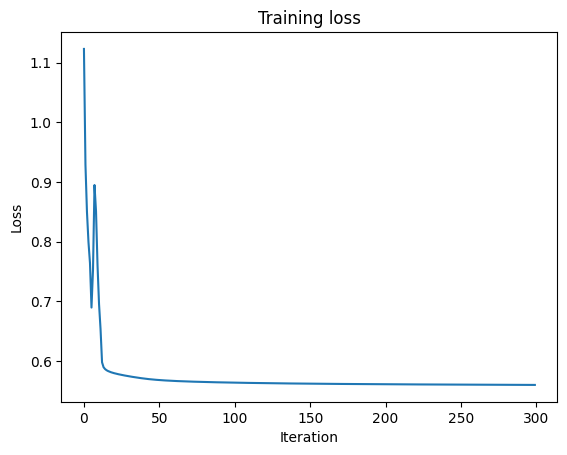

In [134]:
plt.plot(model2.losses)
plt.title("Training loss")
plt.xlabel("Iteration")
plt.ylabel("Loss");

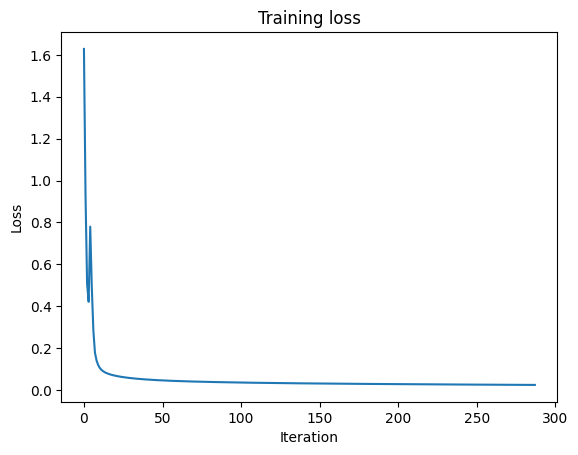

In [135]:
plt.plot(model.losses)
plt.title("Training loss")
plt.xlabel("Iteration")
plt.ylabel("Loss");

**Let's also check our model's performance using the `accuracy` metric on the `testing` dataset**

In [81]:
x_test.shape

(3000, 784)

In [136]:
# Compute the accuracy on the testing set
#############################
# Your code goes here (7 points)


acc = accuracy(model, x_test, y_test)
acc2 = accuracy(model2, x_test, y_test)
#############################

print(acc)
print(acc2)

0.9906666666666667
0.9923333333333333
